Exercise 1

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#for each person, 0 if homozygous for ref, 1 for heterozygous for alt, 2 for homozygous for alt
#calculate alternate allele frequency for each position

df_variants = pd.read_csv("/Users/cmdb/qbb2020-answers/day2-homework/matrix_1kg.txt",
                      sep = '\t')

df_variants


,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#subset the dataframe to only include the allele status
df_alleles = df_variants.iloc[:, 4:]
df_alleles

,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#calculate the allele frequency of each chromosome position using mean   
mean = df_alleles.mean(axis = 1)
mean

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

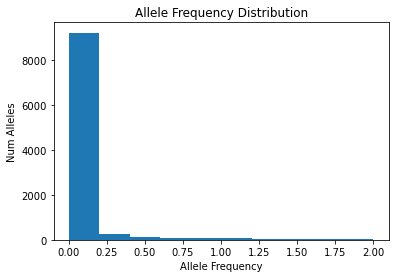

In [5]:
#plot out the mean as a histogram
fig, ax = plt.subplots()
ax.set_title("Allele Frequency Distribution")
ax.set_ylabel("Num Alleles")
ax.set_xlabel("Allele Frequency")
ax.hist(mean)
plt.show()


Exercise 2

In [6]:
#create boolean df for common allele frequencies from >0.05 and <0.95
common_alleles = df_alleles.mean(axis = 1).between(0.05, 0.95, inclusive = False)
common_alleles

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998     True
9999    False
Length: 10000, dtype: bool

In [7]:
#subset the variants dataframe using boolean allele frequency series
df_common_alleles = df_variants.loc[common_alleles]
df_common_alleles

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
37,chr21,28821553,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,chr21,18393571,A,G,0,1,0,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9980,chr21,30950713,A,C,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Exercise 3

In [8]:
#subset the common alleles dataframe to get rid of chrom position + ref sequence info
pca_input = df_common_alleles.iloc[:, 4:]
pca_input


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,1,2,0,1,1,1
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#PCA will compare across all columns in a row, so need to transpose
#to get PCA across samples

pca_input = pca_input.T
pca_input


,20,37,38,41,46,54,57,66,77,93,...,9888,9894,9904,9908,9913,9927,9959,9974,9980,9998
HG00096,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
HG00097,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
HG00099,1,0,2,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
HG00100,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
HG00101,0,0,1,0,0,2,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
NA21141,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
NA21142,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
NA21143,0,0,0,0,0,2,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [10]:
#check mean allele frequeny of each variant across the populations
pca_input.mean(axis = 0)

20      0.160518
37      0.061224
38      0.811224
41      0.188776
46      0.195055
          ...   
9927    0.654631
9959    0.231947
9974    0.361460
9980    0.155416
9998    0.057692
Length: 995, dtype: float64

In [11]:
#transform SNP genotype of each person for PCA
pca_input_standardized = StandardScaler().fit_transform(pca_input)
pca_input_standardized.mean(axis = 0)



array([-1.56424673e-16, -1.01172777e-15,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  2.28942105e-15,  5.70536118e-16,
        1.65749152e-16,  2.45835098e-16,  2.91847481e-16, -1.71966924e-15,
        3.19036616e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  5.13979231e-16,  1.90010226e-15,
        3.07794955e-16,  1.41814870e-15,  2.18210240e-16,  1.21828241e-16,
       -2.11726677e-15, -3.32805473e-16, -1.36189682e-15, -3.84264398e-16,
        1.92110413e-16,  2.84091606e-16, -3.47184343e-16,  2.08206032e-15,
       -4.99861795e-16, -1.89713934e-15, -4.65701087e-16, -1.42045803e-16,
       -8.84583702e-16,  2.96379004e-16,  3.13546503e-16, -2.23621923e-15,
       -6.62038016e-16,  2.15839905e-15, -1.99674570e-15, -2.44266494e-16,
       -5.92017278e-16,  1.59069513e-15, -3.25398177e-16, -9.36957646e-16,
       -7.13496940e-16,  3.40866355e-16,  1.24965449e-16,  2.07622163e-17,
        4.61518143e-16, -

In [12]:
#check the variance of the standardized PCA input
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
#get the first 10 principal components of transformed PCA dataframe
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.62155502, -9.01305058, -0.13222136, ..., -0.36470384,
        -1.09333886,  1.2213653 ],
       [-6.25245932, -8.48463371,  1.97249643, ...,  0.7289852 ,
        -3.39449001,  0.28396101],
       [-6.20196351, -7.49404134,  0.30751376, ..., -1.22710971,
        -0.83082874,  0.5648861 ],
       ...,
       [-4.66857746, -2.81535267, -2.91327396, ..., -1.51504101,
         1.72335849,  0.16415725],
       [-6.38786618, -2.88337654, -4.37158956, ...,  1.40589714,
         0.03894298, -0.30286173],
       [-5.15728886, -0.26905062, -5.85941079, ..., -2.55741491,
        -0.66756397, -0.5686048 ]])

In [14]:
#Fit array of the first 10 principal components into a dataframe
pca_output_df = pd.DataFrame (data = pca_output, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.621555,-9.013051,-0.132221,-4.718596,0.056679,0.593919,-3.164251,-0.364704,-1.093339,1.221365
1,-6.252459,-8.484634,1.972496,-3.425399,1.161419,-0.383966,-1.420287,0.728985,-3.394490,0.283961
2,-6.201964,-7.494041,0.307514,-4.859751,0.197301,0.479924,-0.099981,-1.227110,-0.830829,0.564886
3,-5.065617,-5.671574,1.864072,-3.453304,2.546530,-1.059434,0.926613,-1.666510,-0.783538,0.703987
4,-6.760246,-8.923753,2.380196,-2.817713,-2.659959,1.327970,-0.878220,-0.389357,-1.162775,0.210956
...,...,...,...,...,...,...,...,...,...,...
2543,-6.466132,0.340685,-2.580875,4.257328,-0.286484,-1.996120,-2.268461,0.695265,4.286379,0.212285
2544,-6.594330,-2.616532,-5.129374,3.109255,1.797091,-0.510571,-1.521892,0.140478,1.271588,-2.012758
2545,-4.668577,-2.815353,-2.913274,3.279293,0.969803,-0.464277,0.996949,-1.515041,1.723358,0.164157
2546,-6.387866,-2.883377,-4.371590,3.208851,-2.864034,2.409439,-0.126845,1.405897,0.038943,-0.302862


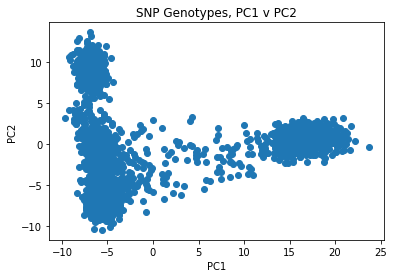

In [15]:
#plot out PC1 vs PC2 in a scatterplot
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
ax.set_title("SNP Genotypes, PC1 v PC2")
ax.set_ylabel("PC2")
ax.set_xlabel("PC1")
plt.show()